## Problem 1

(a)
	There are 807 songs and 2421 users in the training dataset.
    Mean rating:  1.322631184306889
    Median rating:  1.0 
    Standard deviation of rating:  0.46088622855102235
    Minimum rating:  1.0 
    Maximum rating:  4.768655987487031 

(b)
    (i)
        Total parameters: 807 + 2421 = 3228
		Total observations: 807 * 2421 = 243,103
    (ii)
        The three most popular songs can be obtained by finding the songs with the largest absolute β coefficients.
           Rank  SongID      SongName            ArtistName
            1     54      You're The One        Dwight Yoakam
            2     26          Undo                  Bjork
            3     439        Secrets            One Republic
    (iii)
        The three most enthusiastic users can be obtained by finding the users with the largest absolute α coefficients.
               Rank  usersID     
                1     1540    
                2     838      
                3     1569    
    (iv)
            MAE: 0.07050130764733499 
            RMSE: 0.09593753923636947 
            OSR2: 0.9999999633164803 

(c)
    (i)
        N = (2421 + 807)*k + 2421 + 807
          = 3228*(k+1)
        We will have 243,103 observations on training set.
    (ii)
        With the plot, we are going to find the number of archetypes that minimum MAE.
        Thus, we choose k = 5
    (iii)     
            MAE 0.07156351528829008 
            RMSE 0.09818733626628202 
            OSR2 0.2660687074064404 

(d)
    (i)
        In this part, I fitted Linear Regression and Random Forest with 'genre' and 'song'.
                         Linear Regression                Random Forest
            MAE         0.09511715266706726              0.09525072158902206
            RMSE        0.11680842279644714              0.11767366245525483 
            OSR2       -0.038706306826838066            -0.05415140004340624 
    (ii)
            Blending Model = 0.0043*CF + (-0.0477)*LR + (1.0418)*RF
                     Linear Regression      Random Forest         CF                 Blended
            MAE   0.09548973170955878    0.09563490415000771  0.07156351528829008   0.09540006307925863
            RMSE  0.11797669915578514    0.11872733173852723  0.09818733626628202   0.11857246810303192 
            OSR2 -0.027760915195930602  -0.04088088034849946  0.28811380316297563  -0.03816727655248231

## Code

In [ ]:
import numpy as np
import pandas as pd

In [2]:
MusicRatingsTrain = pd.read_csv("MusicRatingsTrain.csv", index_col = 0)
MusicRatingsValidationA = pd.read_csv("MusicRatingsValidationA.csv", index_col = 0)
MusicRatingsValidationB = pd.read_csv("MusicRatingsValidationB.csv", index_col = 0)
MusicRatingsTest = pd.read_csv("MusicRatingsTest.csv", index_col = 0)

In [3]:
MusicRatingsTrain.sort_index()
MusicRatingsTrain_df = MusicRatingsTrain.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
MusicRatingsTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421 entries, 1 to 2421
Columns: 807 entries, 1 to 807
dtypes: float64(807)
memory usage: 14.9 MB


In [4]:
# Compute the summary statistics for the rating variable
mean_rating = MusicRatingsTrain["rating"].mean()
median_rating = MusicRatingsTrain["rating"].median()
std_rating = MusicRatingsTrain["rating"].std()
min_rating = MusicRatingsTrain["rating"].min()
max_rating = MusicRatingsTrain["rating"].max()

# Print the results
print("Mean rating: ", mean_rating)
print("Median rating: ", median_rating)
print("Standard deviation of rating: ", std_rating)
print("Minimum rating: ", min_rating)
print("Maximum rating: ", max_rating)

Mean rating:  1.322631184306889
Median rating:  1.0
Standard deviation of rating:  0.46088622855102235
Minimum rating:  1.0
Maximum rating:  4.768655987487031


In [5]:
MusicRatingsValidationA.sort_index()
MusicRatingsValidationA_df = MusicRatingsValidationA.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
#movie_lens_valA_df.info()
valA_extra_columns = list(set(range(1,807+1)) - set(MusicRatingsValidationA_df.columns))
# print('# of missing columns: %s; # of missing musics: %s' % (2421-MusicRatingsValidationA_df.shape[1], len(valA_extra_columns)))
MusicRatingsValidationA_df[valA_extra_columns]=np.nan
MusicRatingsValidationA_df=MusicRatingsValidationA_df[MusicRatingsTrain_df.columns]
MusicRatingsValidationA_df = MusicRatingsTrain_df[[]].join(MusicRatingsValidationA_df, how='outer')
print(MusicRatingsValidationA_df.shape)

(2421, 807)


In [6]:
MusicRatingsValidationB.sort_index()
MusicRatingsValidationB_df = MusicRatingsValidationB.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
valB_extra_columns = list(set(range(1,807+1)) - set(MusicRatingsValidationB_df.columns))
MusicRatingsValidationB_df[valB_extra_columns]=np.nan
MusicRatingsValidationB_df = MusicRatingsValidationB_df[MusicRatingsTrain_df.columns]
MusicRatingsValidationB_df = MusicRatingsTrain_df[[]].join(MusicRatingsValidationB_df, how='outer')
print(MusicRatingsValidationB_df.shape)

(2421, 807)


In [7]:
MusicRatingsTest.sort_index()
MusicRatingsTest_df = MusicRatingsTest.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
test_extra_columns = list(set(range(1,3706+1)) - set(MusicRatingsTest_df.columns))
MusicRatingsTest_df[test_extra_columns]=np.nan
MusicRatingsTest_df = MusicRatingsTest_df[MusicRatingsTrain_df.columns]
MusicRatingsTest_df = MusicRatingsTrain_df[[]].join(MusicRatingsTest_df, how='outer')
print(MusicRatingsTest_df.shape)

C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MusicRatingsTest_df[test_extra_columns]=np.nan
C:\Users\Denis\AppData\Local\Temp\ipykernel_6740\1320885214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

(2421, 807)


In [8]:
MusicRatingsTrain_mat = MusicRatingsTrain_df.to_numpy()
MusicRatingsValidationA_mat = MusicRatingsValidationA_df.to_numpy()
MusicRatingsValidationB_mat = MusicRatingsValidationB_df.to_numpy()
MusicRatingsTest_mat = MusicRatingsTest_df.to_numpy()

In [9]:
MusicRatingsValidationA_mask = ~np.isnan(MusicRatingsValidationA_mat)
print(np.sum(MusicRatingsValidationA_mask))
MusicRatingsValidationB_mask = ~np.isnan(MusicRatingsValidationB_mat)
print(np.sum(MusicRatingsValidationB_mask))
MusicRatingsTest_mask = ~np.isnan(MusicRatingsTest_mat)
print(np.sum(MusicRatingsTest_mask))

14470
14471
14471


## Basic Analysis (without using features)

In [10]:
from fancyimpute import BiScaler
from fancyimpute import SoftImpute
MusicRatings_biscaler = BiScaler(scale_rows=False, scale_columns=False, verbose=True)
MusicRatingsTrain_mat_centered = MusicRatings_biscaler.fit_transform(MusicRatingsTrain_mat)
MusicRatings_soft_imputer = SoftImpute(max_rank=5, verbose=True)
MusicRatings_centered_filled = MusicRatings_soft_imputer.fit_transform(MusicRatingsTrain_mat_centered)

[BiScaler] Initial log residual value = 8.636690
[BiScaler] Iter 1: log residual = -1.283248, log improvement ratio=9.919937
[BiScaler] Iter 2: log residual = -2.468379, log improvement ratio=1.185132
[BiScaler] Iter 3: log residual = -3.602839, log improvement ratio=1.134459
[BiScaler] Iter 4: log residual = -4.731547, log improvement ratio=1.128708
[BiScaler] Iter 5: log residual = -5.851961, log improvement ratio=1.120415
[BiScaler] Iter 6: log residual = -6.959236, log improvement ratio=1.107275
[BiScaler] Iter 7: log residual = -8.045993, log improvement ratio=1.086756
[BiScaler] Iter 8: log residual = -9.101878, log improvement ratio=1.055885
[BiScaler] Iter 9: log residual = -10.114070, log improvement ratio=1.012192
[BiScaler] Iter 10: log residual = -11.069605, log improvement ratio=0.955535
[BiScaler] Iter 11: log residual = -11.959489, log improvement ratio=0.889884
[BiScaler] Iter 12: log residual = -12.782528, log improvement ratio=0.823039
[BiScaler] Iter 13: log residual

[SoftImpute] Iter 9: observed MAE=0.264275 rank=5
[SoftImpute] Iter 10: observed MAE=0.263702 rank=5
[SoftImpute] Iter 11: observed MAE=0.263158 rank=5
[SoftImpute] Iter 12: observed MAE=0.262650 rank=5
[SoftImpute] Iter 13: observed MAE=0.262207 rank=5
[SoftImpute] Iter 14: observed MAE=0.261805 rank=5
[SoftImpute] Iter 15: observed MAE=0.261459 rank=5
[SoftImpute] Iter 16: observed MAE=0.261144 rank=5
[SoftImpute] Iter 17: observed MAE=0.260854 rank=5
[SoftImpute] Iter 18: observed MAE=0.260598 rank=5
[SoftImpute] Iter 19: observed MAE=0.260342 rank=5
[SoftImpute] Iter 20: observed MAE=0.260132 rank=5
[SoftImpute] Iter 21: observed MAE=0.259941 rank=5
[SoftImpute] Iter 22: observed MAE=0.259762 rank=5
[SoftImpute] Iter 23: observed MAE=0.259596 rank=5
[SoftImpute] Iter 24: observed MAE=0.259452 rank=5
[SoftImpute] Iter 25: observed MAE=0.259319 rank=5
[SoftImpute] Iter 26: observed MAE=0.259211 rank=5
[SoftImpute] Iter 27: observed MAE=0.259095 rank=5
[SoftImpute] Iter 28: observed M

In [11]:
alpha = MusicRatings_biscaler.row_means
beta = MusicRatings_biscaler.column_means

user = pd.DataFrame(columns=['alpha'])
songs = pd.DataFrame(columns=['beta'])

# Sort users and songs by their alpha and beta values respectively
user['alpha'] = alpha
songs['beta'] = beta
users = user.sort_values('alpha', ascending=False)
songs = songs.sort_values('beta', ascending=False)

# index need to +1
print(users.head(3))
print(songs.head(3))

         alpha
1539  0.980499
837   0.822825
1568  0.810956
         beta
53   2.176931
25   2.146214
438  2.055549


In [12]:
MusicRatingsTrain[MusicRatingsTrain['songID']==54].head(1)

,songID,rating,songName,year,artist,genre
userID,,,,,,
685,54,1.0,You're The One,1990,Dwight Yoakam,Country


In [13]:
MusicRatingsTrain[MusicRatingsTrain['songID']==26].head(1)

,songID,rating,songName,year,artist,genre
userID,,,,,,
440,26,3.326332,Undo,2001,Bjork,Rock


In [14]:
MusicRatingsTrain[MusicRatingsTrain['songID']==439].head(1)

,songID,rating,songName,year,artist,genre
userID,,,,,,
1844,439,1.494918,Secrets,2009,OneRepublic,Rock


In [15]:
MusicRatings_filled = MusicRatings_biscaler.inverse_transform(MusicRatings_centered_filled)
MusicRatings_filled = np.clip(MusicRatings_filled, 1, 5)
# MusicRatings_filled

In [16]:
def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(np.abs(masked_diff))

def masked_mse(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(masked_diff ** 2)

def OSR2(mse_model, mse_baseline):
    return 1 - mse_model/mse_baseline

In [17]:
MusicRatingsTest_mae = masked_mae(MusicRatingsTest_mat, MusicRatings_filled, MusicRatingsTest_mask)

print("MAE %s " % (MusicRatingsTest_mae/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

MusicRatingsTest_mse = masked_mse(MusicRatingsTest_mat, MusicRatings_filled, MusicRatingsTest_mask)

print("RMSE %s " % (np.sqrt(MusicRatingsTest_mse)/4))

baseline_pred = np.mean(MusicRatingsTrain)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsTest_mat, baseline_model, MusicRatingsTest_mask)

print("OSR2 %s " % OSR2(MusicRatingsTest_mse, baseline_mse))

MAE 0.07050130764733499 
RMSE 0.09593753923636947 


D:\katelyn\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


OSR2 0.9999999633164803 


D:\katelyn\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Cross Validation

In [18]:
MusicRatingsValidationA_mae_lst = []
for i in range(20):
    param_cv = i+1
    MusicRatings_soft_imputer_cv = SoftImpute(max_rank=param_cv, verbose=False)
    MusicRatings_centered_filled_cv = MusicRatings_soft_imputer_cv.fit_transform(MusicRatingsTrain_mat_centered)
    MusicRatings_filled_cv = MusicRatings_biscaler.inverse_transform(MusicRatings_centered_filled_cv)
    MusicRatings_filled_cv = np.clip(MusicRatings_filled_cv, 1, 5)
    MusicRatingsValidationA_mae_cv = masked_mae(MusicRatingsValidationA_mat, MusicRatings_filled_cv, MusicRatingsValidationA_mask)
    MusicRatingsValidationA_mae_lst.append(MusicRatingsValidationA_mae_cv)
    print('iter %s - Validation MAE %s' % (param_cv, MusicRatingsValidationA_mae_cv))

iter 1 - Validation MAE 0.2880965909710686
iter 2 - Validation MAE 0.2839389843985483
iter 3 - Validation MAE 0.28178773384759526
iter 4 - Validation MAE 0.28269820832309606
iter 5 - Validation MAE 0.2814795297413519
iter 6 - Validation MAE 0.28200432337783493
iter 7 - Validation MAE 0.28261370803540015
iter 8 - Validation MAE 0.2830384215691111
iter 9 - Validation MAE 0.28409377490037274
iter 10 - Validation MAE 0.2861930002089852
iter 11 - Validation MAE 0.2871491060913831
iter 12 - Validation MAE 0.28644073803862496
iter 13 - Validation MAE 0.29007647579310536
iter 14 - Validation MAE 0.2908535397658231
iter 15 - Validation MAE 0.2913038705062888
iter 16 - Validation MAE 0.29416642434880136
iter 17 - Validation MAE 0.29447239484827725
iter 18 - Validation MAE 0.29636698617565976
iter 19 - Validation MAE 0.29760075345448256
iter 20 - Validation MAE 0.2991863594374175


In [19]:
# MusicRatingsTrain_mat_centered

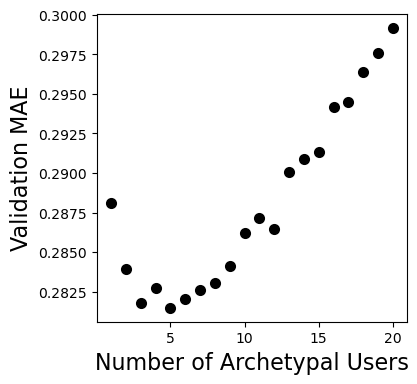

In [20]:
import matplotlib.pyplot as plt
x = range(1,21)
y = MusicRatingsValidationA_mae_lst
plt.figure(figsize=(4, 4))
plt.scatter(x, y, linewidth=2, color='black')
plt.xlabel('Number of Archetypal Users', fontsize=16)
plt.ylabel('Validation MAE', fontsize=16)
plt.show()

## Model Blending/Stacking

Collaborative Filtering

In [21]:
MusicRatingsTrain = pd.get_dummies(MusicRatingsTrain, columns=['genre'])
MusicRatingsValidationA = pd.get_dummies(MusicRatingsValidationA, columns=['genre'])
MusicRatingsValidationB = pd.get_dummies(MusicRatingsValidationB, columns=['genre'])
MusicRatingsTest = pd.get_dummies(MusicRatingsTest, columns=['genre'])

In [22]:
MusicRatings_soft_imputer = SoftImpute(max_rank=10, verbose=False) #use the best 
MusicRatings_centered_filled = MusicRatings_soft_imputer.fit_transform(MusicRatingsTrain_mat_centered)
MusicRatings_filled_matrix = MusicRatings_biscaler.inverse_transform(MusicRatings_centered_filled)
MusicRatings_filled_matrix = np.clip(MusicRatings_filled_matrix, 1, 5)

In [23]:
val_mae_cf = masked_mae(MusicRatingsValidationB_mat, MusicRatings_filled_matrix, MusicRatingsValidationB_mask)
print("MAE %s " % (val_mae_cf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_cf = masked_mse(MusicRatingsValidationB_mat, MusicRatings_filled_matrix, MusicRatingsValidationB_mask)
print("RMSE %s " % (np.sqrt(val_mse_cf)/4))

baseline_pred = np.mean(MusicRatingsTrain_df)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsValidationB_mat, baseline_model, MusicRatingsValidationB_mask)

print("OSR2 %s " % OSR2(val_mse_cf, baseline_mse))

MAE 0.07156351528829008 
RMSE 0.09818733626628202 
OSR2 0.2660687074064404 


D:\katelyn\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [24]:
val_pred_cf = MusicRatings_filled_matrix[MusicRatingsValidationB_mask]

blend_valB_df = MusicRatingsValidationB.reset_index()[['userID','songID','rating']]

blend_valB_df['val_pred_cf']=val_pred_cf
# blend_valB_df

Linear Regression

In [25]:
# Some extra data preprocessing, converting numbers to categorical variables
MusicRatingsTrain['year'] = MusicRatingsTrain.year.astype('category')
MusicRatingsValidationA['year'] = MusicRatingsValidationA.year.astype('category')
MusicRatingsTest['year'] = MusicRatingsTest.year.astype('category')
# MusicRatingsTest

In [26]:
# Some extra data preprocessing, converting numbers to categorical variables
MusicRatingsTrain = MusicRatingsTrain.drop(['songName','artist'], axis=1)
MusicRatingsValidationA = MusicRatingsValidationA.drop(['songName', 'artist'], axis=1)
MusicRatingsValidationB = MusicRatingsValidationB.drop(['songName', 'artist'], axis=1)
MusicRatingsTest = MusicRatingsTest.drop(['songName', 'artist'], axis=1)
MusicRatingsValidationB

,songID,rating,year,genre_Country,genre_Electronic,genre_Folk,genre_Pop,genre_Rap,genre_RnB,genre_Rock
userID,,,,,,,,,,
2025,425,1.784426,2006,0,0,0,1,0,0,0
2318,400,1.000000,2009,0,0,1,0,0,0,0
2009,792,2.568853,2009,0,0,0,1,0,0,0
1280,584,1.000000,2000,0,0,0,0,0,0,1
146,534,1.000000,2004,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1549,332,1.000000,2000,0,0,0,0,0,0,1
979,667,1.000000,2007,0,1,0,0,0,0,0
1737,594,1.000000,2009,0,0,0,0,0,0,1


In [27]:
depedent_var = MusicRatingsTrain.columns.difference(["rating","userID","songID"])
print(len(depedent_var))
depedent_var = "+".join(depedent_var)
depedent_var

8


'genre_Country+genre_Electronic+genre_Folk+genre_Pop+genre_Rap+genre_RnB+genre_Rock+year'

In [28]:
import statsmodels.formula.api as smf
my_formula = "rating ~" + depedent_var
MusicRatings_ols = smf.ols(formula=my_formula, data=MusicRatingsTrain)
res = MusicRatings_ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     262.4
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:28:12   Log-Likelihood:            -1.5425e+05
No. Observations:              245997   AIC:                         3.086e+05
Df Residuals:                  245963   BIC:                         3.089e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.651e+11   2.19e+11  

In [29]:
MusicRatingsValidationB.reset_index(drop=True, inplace=True)
val_pred_ols = res.predict(MusicRatingsValidationB)
blend_valB_df['val_pred_ols']=val_pred_ols
blend_valB_df

,userID,songID,rating,val_pred_cf,val_pred_ols
0,2025,425,1.784426,1.649517,1.324860
1,2318,400,1.000000,1.310352,1.418427
2,2009,792,2.568853,1.561992,1.384064
3,1280,584,1.000000,2.090934,1.314575
4,146,534,1.000000,1.556215,1.206940
...,...,...,...,...,...
14466,1549,332,1.000000,1.208476,1.314575
14467,979,667,1.000000,1.184756,1.381439
14468,1737,594,1.000000,1.741607,1.348114
14469,445,533,2.149164,1.202302,1.290833


In [30]:
val_mae_ols = np.mean(np.abs(MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_ols))
print("MAE %s " % (val_mae_ols/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_ols = np.mean((MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_ols)**2)
print("RMSE %s " % (np.sqrt(val_mse_ols)/4))

print("OSR2 %s " % OSR2(val_mse_ols, baseline_mse))

MAE 0.09511715266706726 
RMSE 0.11680842279644714 
OSR2 -0.038706306826838066 


Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

# MusicRatingsTrain_rest_index = MusicRatingsTrain.reset_index()
X_train = MusicRatingsTrain.drop(columns = ["songID","rating"])
y_train = MusicRatingsTrain["rating"]
rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   39.4s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [32]:
val_pred_rf=rf.predict(MusicRatingsValidationB.drop(columns = ["songID","rating"]))

blend_valB_df['val_pred_rf']=val_pred_rf
blend_valB_df

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


,userID,songID,rating,val_pred_cf,val_pred_ols,val_pred_rf
0,2025,425,1.784426,1.649517,1.324860,1.278080
1,2318,400,1.000000,1.310352,1.418427,1.153099
2,2009,792,2.568853,1.561992,1.384064,1.381133
3,1280,584,1.000000,2.090934,1.314575,1.307490
4,146,534,1.000000,1.556215,1.206940,1.219167
...,...,...,...,...,...,...
14466,1549,332,1.000000,1.208476,1.314575,1.307490
14467,979,667,1.000000,1.184756,1.381439,1.399646
14468,1737,594,1.000000,1.741607,1.348114,1.358524
14469,445,533,2.149164,1.202302,1.290833,1.292382


In [33]:
val_mae_rf = np.mean(np.abs(MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_rf))
print("MAE %s " % (val_mae_rf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_rf = np.mean((MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_rf)**2)
print("RMSE %s " % (np.sqrt(val_mse_rf)/4))

print("OSR2 %s " % OSR2(val_mse_rf, baseline_mse))

MAE 0.09525072158902206 
RMSE 0.11767366245525483 
OSR2 -0.05415140004340624 


Combine three models using OLS

In [34]:
blending_ols = smf.ols(formula='rating ~ val_pred_cf+val_pred_ols+val_pred_rf -1', data=blend_valB_df)
blending_res = blending_ols.fit()
print(blending_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                          4.220e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                        0.00
Time:                        20:28:52   Log-Likelihood:                         -8897.1
No. Observations:               14471   AIC:                                  1.780e+04
Df Residuals:                   14468   BIC:                                  1.782e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [35]:
val_pred_blended =blending_res.predict(blend_valB_df)
blend_valB_df['pred_blended']= val_pred_blended

blend_valB_df

,userID,songID,rating,val_pred_cf,val_pred_ols,val_pred_rf,pred_blended
0,2025,425,1.784426,1.649517,1.324860,1.278080,1.275399
1,2318,400,1.000000,1.310352,1.418427,1.153099,1.139262
2,2009,792,2.568853,1.561992,1.384064,1.381133,1.379560
3,1280,584,1.000000,2.090934,1.314575,1.307490,1.308431
4,146,534,1.000000,1.556215,1.206940,1.219167,1.219249
...,...,...,...,...,...,...,...
14466,1549,332,1.000000,1.208476,1.314575,1.307490,1.304631
14467,979,667,1.000000,1.184756,1.381439,1.399646,1.397348
14468,1737,594,1.000000,1.741607,1.348114,1.358524,1.358494
14469,445,533,2.149164,1.202302,1.290833,1.292382,1.289998


In [36]:
val_mae_blended = np.mean(np.abs(MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_blended))
print("MAE %s " % (val_mae_blended/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_blended = np.mean((MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_blended)**2)
print("RMSE %s " % (np.sqrt(val_mse_blended)/4))

print("OSR2 %s " % OSR2(val_mse_blended, baseline_mse))

MAE 0.09501870204804916 
RMSE 0.11752084830512047 
OSR2 -0.05141527966510573 


Test set performance

In [37]:
baseline_pred = np.mean(MusicRatingsTrain_df)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsTest_mat, baseline_model, MusicRatingsTest_mask)
baseline_mse

D:\katelyn\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.2166807682666739

In [38]:
test_mae_cf = masked_mae(MusicRatingsTest_mat, MusicRatings_filled_matrix, MusicRatingsTest_mask)
print("Test_cf MAE  %s " % (val_mae_cf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_cf = masked_mse(MusicRatingsTest_mat, MusicRatings_filled_matrix, MusicRatingsTest_mask)
print("Test_cf RMSE %s " % (np.sqrt(val_mse_cf)/4))

baseline_pred = np.mean(MusicRatingsTrain_df)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsTest_mat, baseline_model, MusicRatingsTest_mask)

print("Test_cf OSR2 %s " % OSR2(val_mse_cf, baseline_mse))

Test_cf MAE  0.07156351528829008 
Test_cf RMSE 0.09818733626628202 
Test_cf OSR2 0.28811380316297563 


D:\katelyn\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [39]:
test_pred_cf = MusicRatings_filled_matrix[MusicRatingsTest_mask]

blend_test_df = MusicRatingsTest.reset_index()[['userID','songID','rating']]

blend_test_df['test_pred_cf']=test_pred_cf
blend_test_df

,userID,songID,rating,test_pred_cf
0,501,736,1.000000,1.828603
1,1162,753,1.494918,1.745244
2,898,5,1.000000,2.062042
3,472,752,1.784426,1.979114
4,1307,630,1.000000,1.187766
...,...,...,...,...
14466,53,773,1.494918,1.069164
14467,2218,424,1.494918,1.139089
14468,782,91,1.000000,1.152098
14469,869,621,1.000000,1.334278


In [40]:
MusicRatingsTest.reset_index(drop=True, inplace=True)
test_pred_ols = res.predict(MusicRatingsTest)
blend_test_df['test_pred_ols']=test_pred_ols
blend_test_df

,userID,songID,rating,test_pred_cf,test_pred_ols
0,501,736,1.000000,1.828603,1.384064
1,1162,753,1.494918,1.745244,1.413422
2,898,5,1.000000,2.062042,1.317871
3,472,752,1.784426,1.979114,1.317871
4,1307,630,1.000000,1.187766,1.384064
...,...,...,...,...,...
14466,53,773,1.494918,1.069164,1.323364
14467,2218,424,1.494918,1.139089,1.382949
14468,782,91,1.000000,1.152098,1.368347
14469,869,621,1.000000,1.334278,1.288910


In [41]:
test_mae_ols = np.mean(np.abs(MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_ols))
print("Test_ols MAE  %s " % (test_mae_ols/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_ols = np.mean((MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_ols)**2)
print("Test_ols RMSE %s " % (np.sqrt(test_mse_ols)/4))

print("Test_ols OSR2 %s " % OSR2(test_mse_ols, baseline_mse))

Test_ols MAE  0.09548973170955878 
Test_ols RMSE 0.11797669915578514 
Test_ols OSR2 -0.027760915195930602 


In [42]:
dtm = pd.concat([MusicRatingsTrain, MusicRatingsTest], join = 'inner')
MusicRatingsTrain_new = dtm.iloc[0:MusicRatingsTrain.shape[0]]
MusicRatingsTest_new = dtm.iloc[MusicRatingsTest.shape[0]:]

In [43]:
MusicRatingsTest_new.reset_index(drop=True, inplace=True)
test_pred_rf=rf.predict(MusicRatingsTest.drop(columns = ["songID","rating"]))

blend_test_df['test_pred_rf']=test_pred_rf
blend_test_df

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


,userID,songID,rating,test_pred_cf,test_pred_ols,test_pred_rf
0,501,736,1.000000,1.828603,1.384064,1.381133
1,1162,753,1.494918,1.745244,1.413422,1.439564
2,898,5,1.000000,2.062042,1.317871,1.313881
3,472,752,1.784426,1.979114,1.317871,1.313881
4,1307,630,1.000000,1.187766,1.384064,1.381133
...,...,...,...,...,...,...
14466,53,773,1.494918,1.069164,1.323364,1.373973
14467,2218,424,1.494918,1.139089,1.382949,1.445125
14468,782,91,1.000000,1.152098,1.368347,1.250739
14469,869,621,1.000000,1.334278,1.288910,1.266330


In [44]:
test_mae_rf = np.mean(np.abs(MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_rf))
print("Test_rf MAE  %s " % (test_mae_rf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_rf = np.mean((MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_rf)**2)
print("Test_rf RMSE %s " % (np.sqrt(test_mse_rf)/4))

print("Test_rf OSR2 %s " % OSR2(test_mse_rf, baseline_mse))

Test_rf MAE  0.09563490415000771 
Test_rf RMSE 0.11872733173852723 
Test_rf OSR2 -0.04088088034849946 


In [45]:
blend_test_temp = blend_test_df.rename(columns={"test_pred_cf":"val_pred_cf","test_pred_ols":"val_pred_ols","test_pred_rf":"val_pred_rf" })
test_pred_blended =blending_res.predict(blend_test_temp)
blend_test_df['pred_blended']= test_pred_blended
blend_test_df

,userID,songID,rating,test_pred_cf,test_pred_ols,test_pred_rf,pred_blended
0,501,736,1.000000,1.828603,1.384064,1.381133,1.380708
1,1162,753,1.494918,1.745244,1.413422,1.439564,1.439822
2,898,5,1.000000,2.062042,1.317871,1.313881,1.314808
3,472,752,1.784426,1.979114,1.317871,1.313881,1.314451
4,1307,630,1.000000,1.187766,1.384064,1.381133,1.377948
...,...,...,...,...,...,...,...
14466,53,773,1.494918,1.069164,1.323364,1.373973,1.372875
14467,2218,424,1.494918,1.139089,1.382949,1.445125,1.444460
14468,782,91,1.000000,1.152098,1.368347,1.250739,1.242695
14469,869,621,1.000000,1.334278,1.288910,1.266330,1.263516


In [46]:
test_mae_blended = np.mean(np.abs(MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_blended))
print("Test_blended MAE  %s " % (test_mae_blended/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_blended = np.mean((MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_blended)**2)
print("Test_blended RMSE %s " % (np.sqrt(test_mse_blended)/4))

print("Test_blended OSR2 %s " % OSR2(test_mse_blended, baseline_mse))

Test_blended MAE  0.09540006307925863 
Test_blended RMSE 0.11857246810303192 
Test_blended OSR2 -0.03816727655248231 
